# Business Requirements

1. Telecom companies face high customer churn, meaning many customers leave their service annually, causing revenue loss.
2. The goal is to predict which customers are likely to churn using their previous data, so companies can target them with retention strategies to keep them loyal.

## 1. BASIC EDA

#### 1. Importing Libraries for Data Analysis and Visualization.

In [1]:
import pandas as pd                 # Data-Manipulation 
import matplotlib.pyplot as plt     # Data Plotting & visualization
import seaborn as sns               # Statistical visualization
import numpy as np                  # Numerical computing

import warnings                     # Warning control
from warnings import filterwarnings 
warnings.filterwarnings("ignore")   

#### 2. Load the dataset

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\Haripriya\ExcelR\Project\P576 & Tele-Communication\telecommunications_churn (1).csv")

#### 3. To display first 5 rows

In [3]:
df.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


#### 4. To display Last 5 rows

In [4]:
df.tail()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0
3332,74,1,25,234.4,265.9,241.4,13.7,0,0,113,39.85,82,22.60,77,10.86,4,3.70,77.01,0


#### 5. Find out the shape

In [5]:
df.shape  #Tuple objects are not callable

(3333, 19)

#### 6. find out the size

In [6]:
df.size

63327

#### 7. Information of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

#### Inference

1. The dataset has **3333 rows** and **19 columns**.  
2. There are **no missing values** in any column.  
3. Data types are **integers** and **floats**, which are good for analysis. No Categorical data is found in the dataset
4. Since there are **no missing values**, we don’t need to fill or fix missing data with imputation method.  
5. Columns like **voice_mail_plan** and **international_plan** are numbers but really represent **yes/no (0 or 1)** choices, so should be treated as categories.  
6. Numeric columns like **day_mins** and **day_charge** may need **scaling or normalization** before using some models.  
7. There are **no duplicate rows** in the dataset.

#### 8. Statistical Summary of the numerical columns

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
voice_mail_plan,3333.0,0.276628,0.447398,0.00,0.00,0.00,1.00,1.00
voice_mail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
day_mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
evening_mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
night_mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
international_mins,3333.0,10.237294,2.791840,0.00,8.50,10.30,12.10,20.00
customer_service_calls,3333.0,1.562856,1.315491,0.00,1.00,1.00,2.00,9.00
international_plan,3333.0,0.096910,0.295879,0.00,0.00,0.00,0.00,1.00
day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00


#### 9. Columns in the data set 

In [9]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

#### 10.Find out duplicates

In [10]:
df.duplicated().sum()

0

#### 11.Churn Count

In [11]:
df["churn"].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

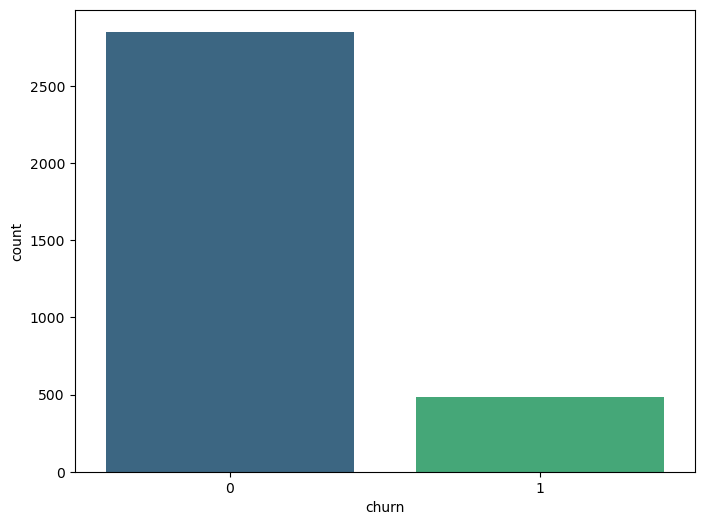

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='churn',hue='churn', data=df, palette='viridis', legend=False)
plt.show()

#### 11. Inference from the Data

1. Dataset has **3333 customers and 19 features** including account details, call usage, charges, and churn status.  
2. The target is **"churn"**, with about **14.5% churn rate**, indicating churners are a **small group (imbalance)**.  
3. Customers' average tenure is **101 days**, ranging from **1 to 243 days**.  
4. Only **28% of customers use a voice mail plan**.  
5. Call minutes during day, evening, and night **vary widely**, showing different usage habits.  
6. Customers make on average **1.56 calls to customer service**, with some up to 9; **more calls may indicate problems**.  
7. About **10% have international calling plans**.  
8. **Charges correlate directly with minutes used**.  
9. Due to class imbalance, models should use methods like **SMOTE to balance the data**.  
10. Important features for predicting churn include **customer service calls, voice mail plan, and call minutes**.  
11. **No missing data; data prep focuses on scaling and fixing imbalance**.  
12. The data can help **build models to predict churn and plan customer retention**.  
13. **Early identification of churners helps reduce telecom company losses**.  
14. Customers who **call service more or lack voice mail plans are more likely to churn**.  
15. **Balancing data and creating good models improves customer retention**.  

**Overall:**  
The dataset is ready to use but requires **careful handling of imbalance and smart use of key features** for best churn prediction results.

# 2. DATA VISUALIZATION

## 1)Histogram

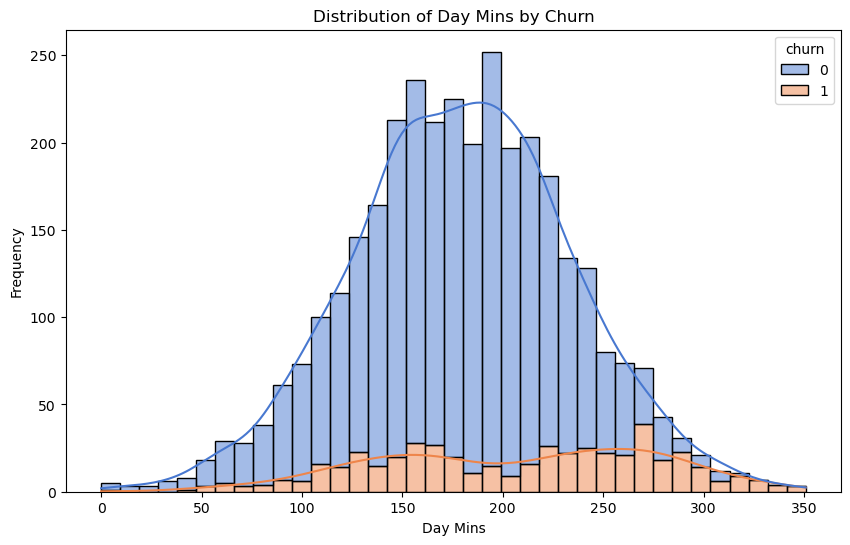

Histogram for day_mins.


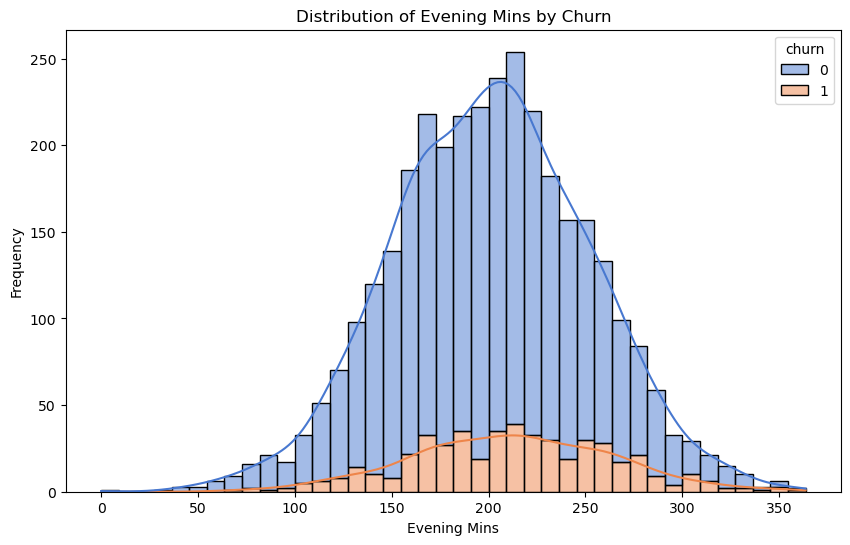

Histogram for evening_mins.


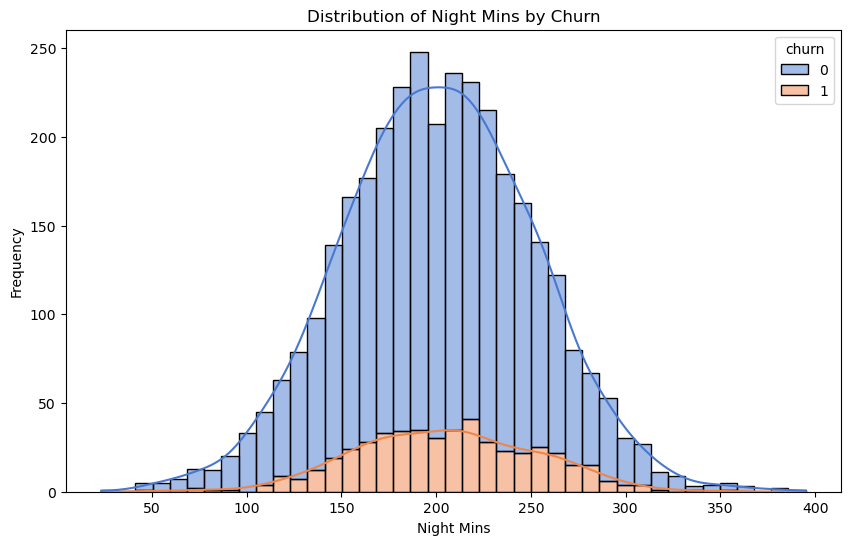

Histogram for night_mins.


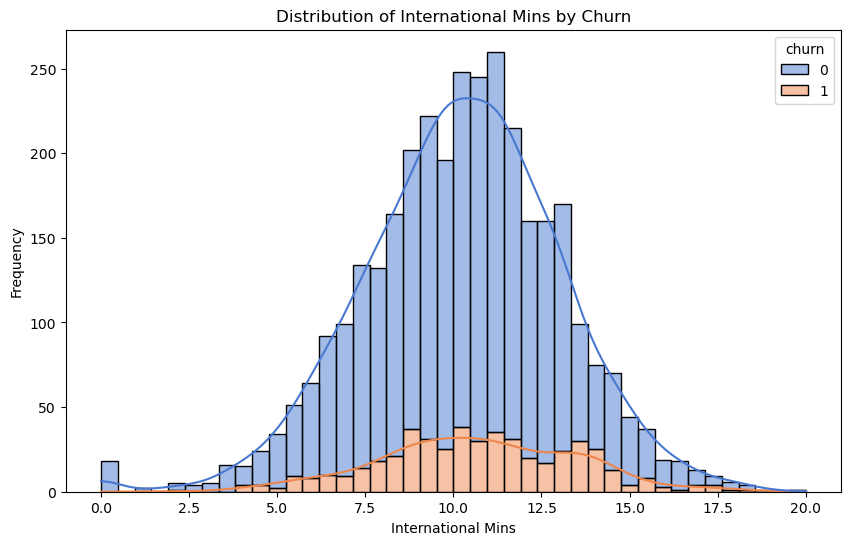

Histogram for international_mins.


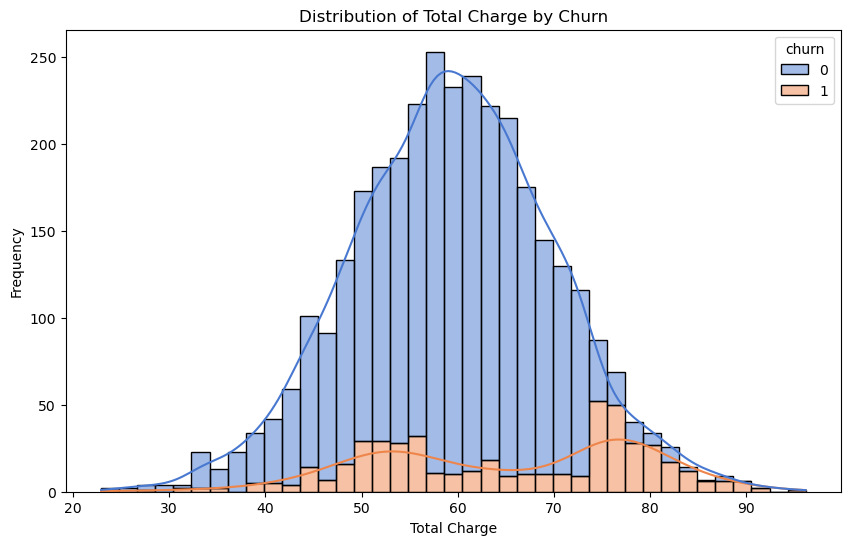

Histogram for total_charge.
Inference: Churned customers tend to have higher usage, especially for 'day_mins' and 'total_charge'.



In [13]:
# 3. Histogram for Numerical Features
numerical_features = ['day_mins', 'evening_mins', 'night_mins', 'international_mins', 'total_charge']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='churn', kde=True, multiple="stack", palette='muted')
    plt.title(f'Distribution of {feature.replace("_", " ").title()} by Churn')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.show()
    print(f"Histogram for {feature}.")
print("Inference: Churned customers tend to have higher usage, especially for 'day_mins' and 'total_charge'.\n")


## 2)BOXPLOT - Distribution + Outliers

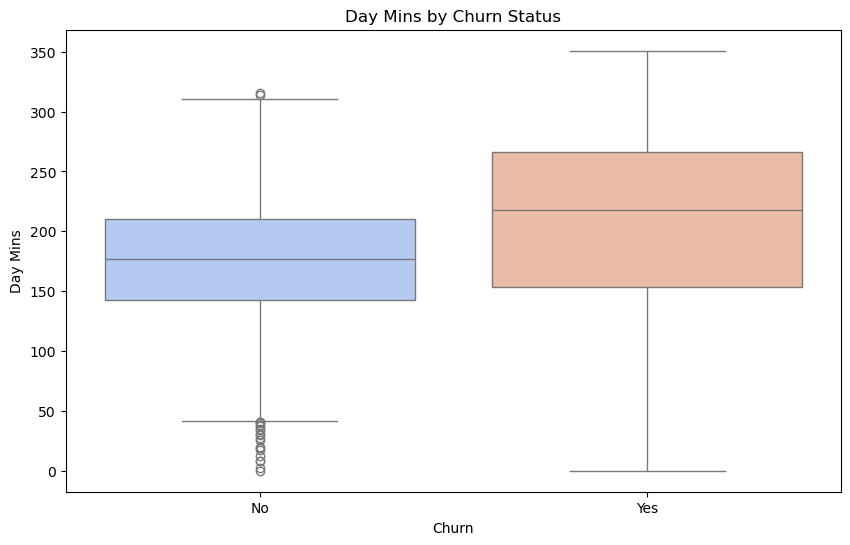

Box Plot for day_mins.


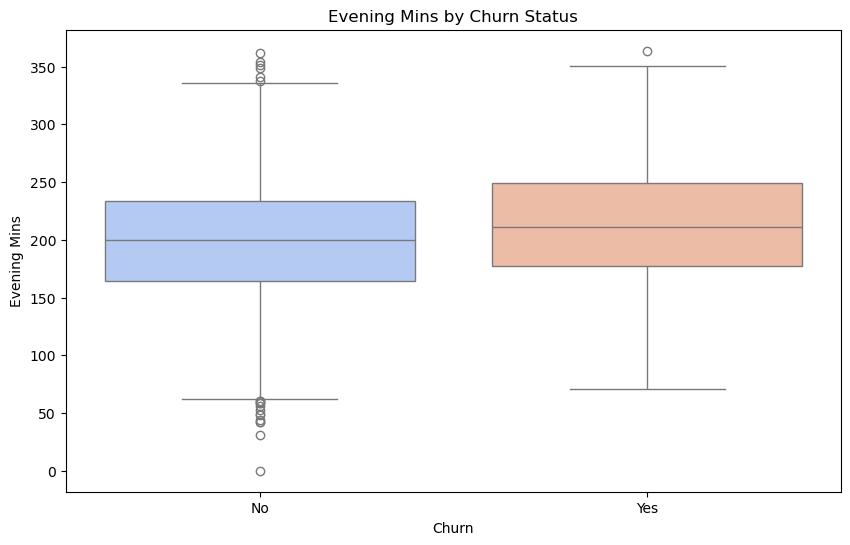

Box Plot for evening_mins.


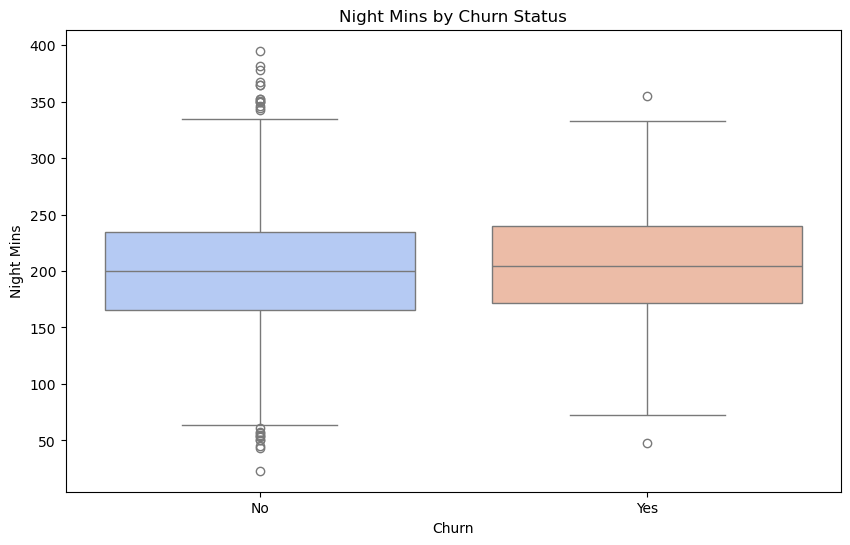

Box Plot for night_mins.


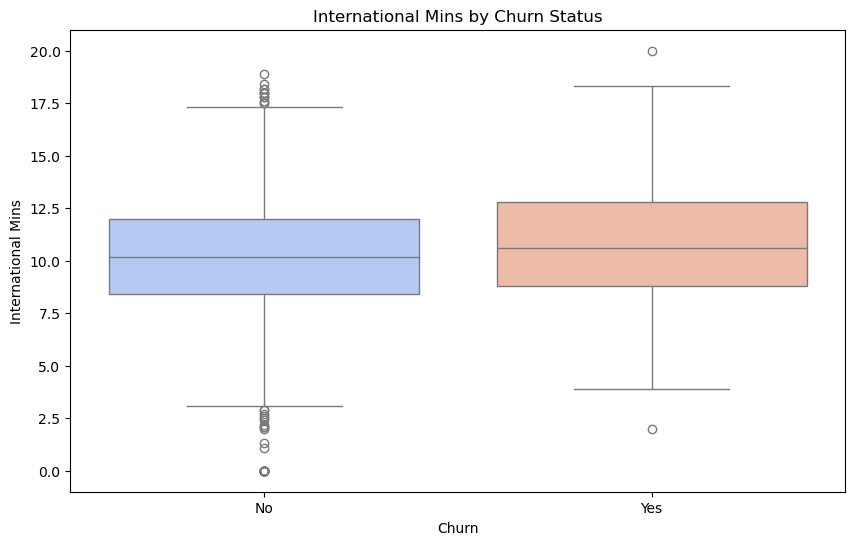

Box Plot for international_mins.


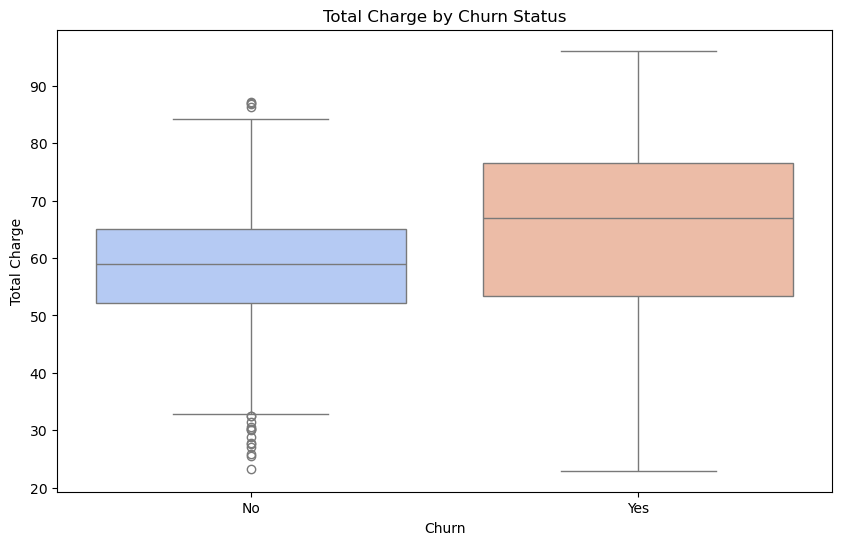

Box Plot for total_charge.
Inference: The median values for key numerical features like 'total_charge' are significantly higher for customers who churned.



In [14]:
# 4. Box Plot for Numerical Features vs. Churn
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='churn', y=feature, palette='coolwarm')
    plt.title(f'{feature.replace("_", " ").title()} by Churn Status')
    plt.xlabel('Churn')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.ylabel(feature.replace("_", " ").title())
    plt.show()
    print(f"Box Plot for {feature}.")
print("Inference: The median values for key numerical features like 'total_charge' are significantly higher for customers who churned.\n")

### OUTLIERS ANALYSIS

1. An outlier is a data point that is very different from the rest of the data. In the box plots, these are the individual dots that fall far outside the main box and lines. While some outliers are just unusual but correct data, others might be mistakes. Removing the wrong outliers can hurt your model's performance, so we'll be careful.

##### Based on this analysis, the only outliers we should remove are from the `customer_service_calls` column.

### remove outliers

In [15]:
column = 'customer_service_calls'

Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Original number of rows:", len(df))
print("Number of rows after removing outliers:", len(df_cleaned))

Original number of rows: 3333
Number of rows after removing outliers: 3066


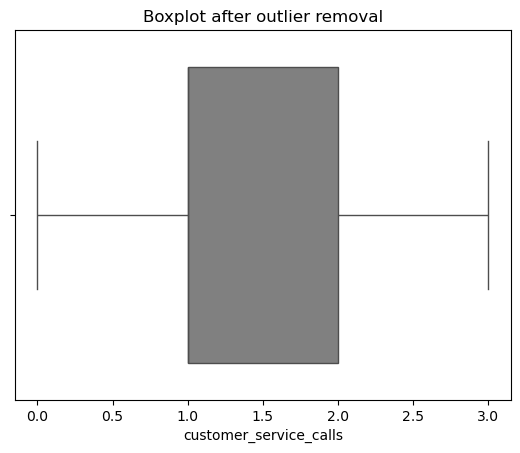

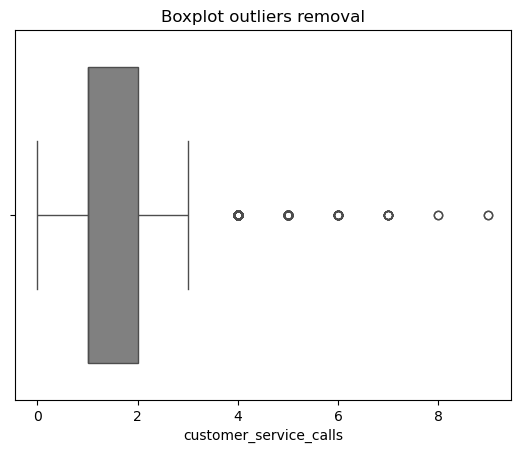

In [16]:
sns.boxplot(x=df_cleaned["customer_service_calls"], color='gray')
plt.title("Boxplot after outlier removal")
plt.show()

sns.boxplot(x=df["customer_service_calls"], color='gray')
plt.title("Boxplot outliers removal")
plt.show()

## 3)Scatterplot - relationships between two continous variables

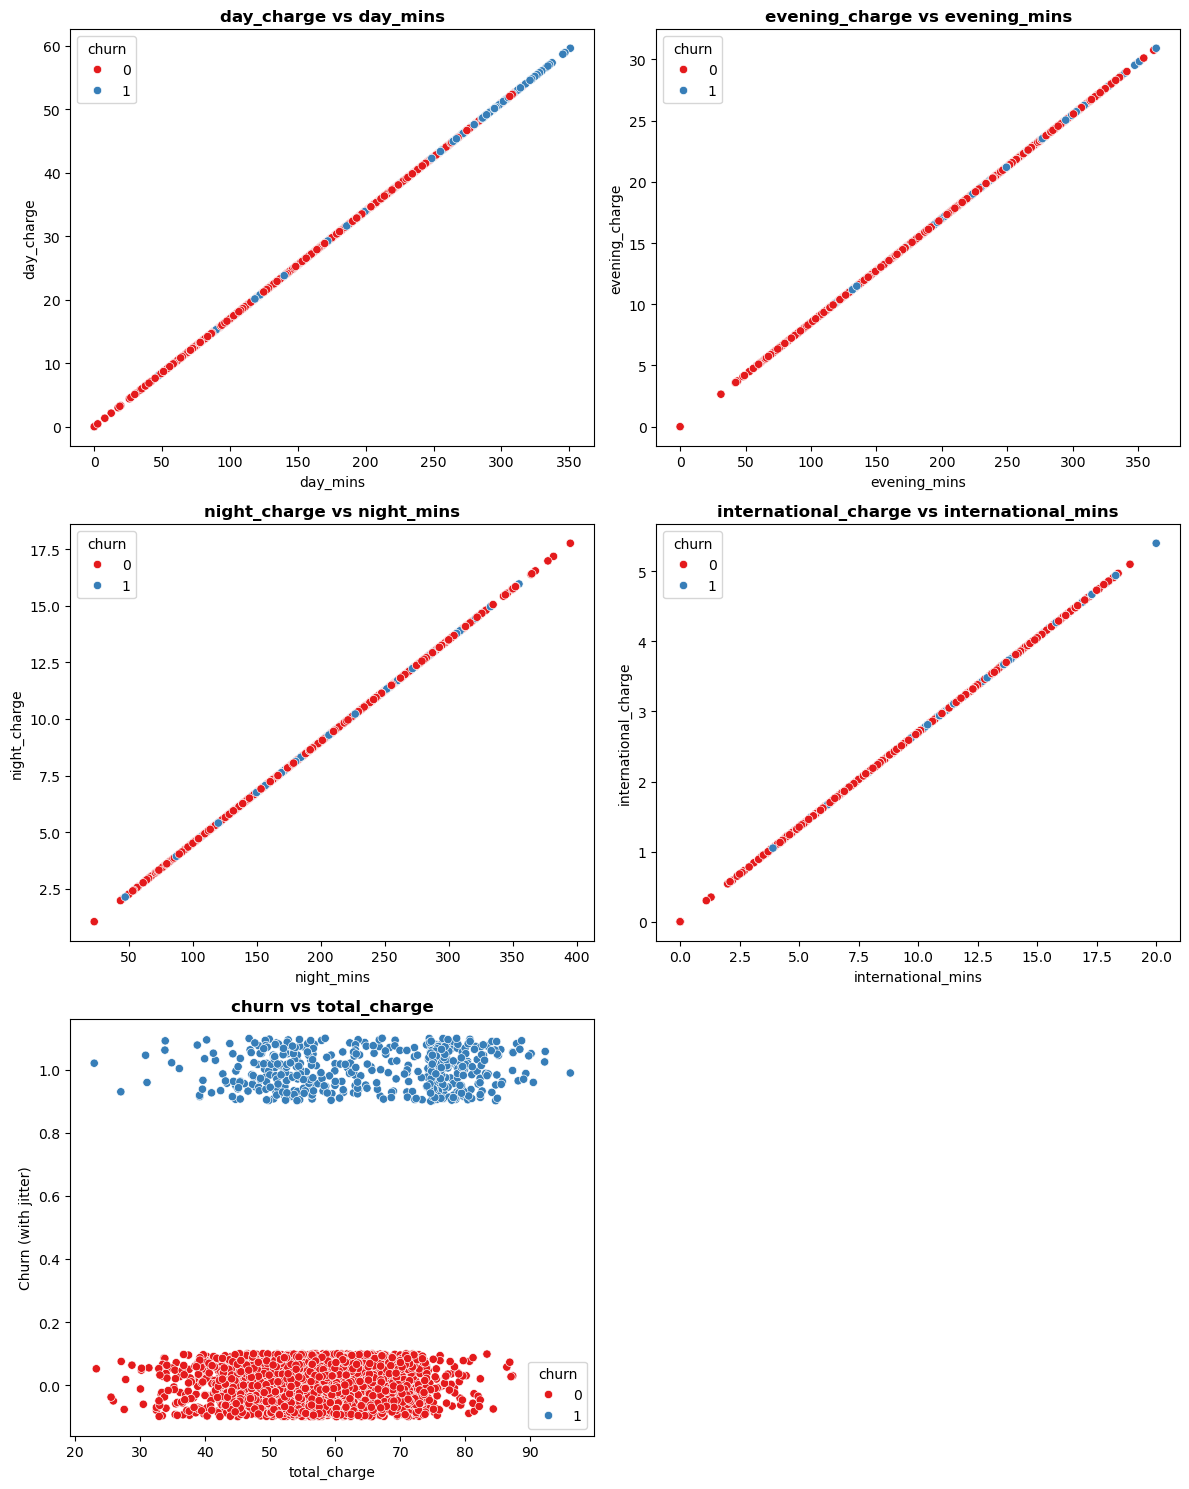

In [17]:
scatter_pairs = [
    ('day_mins', 'day_charge'),
    ('evening_mins', 'evening_charge'),
    ('night_mins', 'night_charge'),
    ('international_mins', 'international_charge'),
    ('total_charge', 'churn')
]

num_cols = 2
num_rows = (len(scatter_pairs) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
axes = axes.flatten()

# Plot each pair
for i, (x_col, y_col) in enumerate(scatter_pairs):
    ax = axes[i]
    
    if y_col == 'churn':
        # Add jitter to churn for better visibility
        jittered_churn = df[y_col] + np.random.uniform(-0.1, 0.1, size=len(df))
        sns.scatterplot(data=df, x=x_col, y=jittered_churn, hue='churn', palette='Set1', ax=ax)
        ax.set_ylabel('Churn (with jitter)')
    else:
        sns.scatterplot(data=df, x=x_col, y=y_col, hue='churn', palette='Set1', ax=ax)
        ax.set_ylabel(y_col)
    
    ax.set_title(f'{y_col} vs {x_col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(x_col)

# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('scatterplot of churn prediction.png')
plt.show()

Here are the key inferences from the scatterplots:

* **Charges Perfectly Mirror Usage:** The first four plots show that call charges (day, evening, night, international) are calculated at a **fixed rate per minute**. The relationship is a perfect straight line. This means the `charge` and `minutes` variables are redundant; they provide the exact same information.

* **Higher Bills May Indicate Higher Churn Risk:** The last plot shows the relationship between the total charge and customer churn. While there is a lot of overlap, customers who churned (the blue dots at the top) seem to be slightly more concentrated in the **higher `total_charge` range**. This suggests that while a high bill doesn't guarantee a customer will leave, it may be a contributing factor to churn.

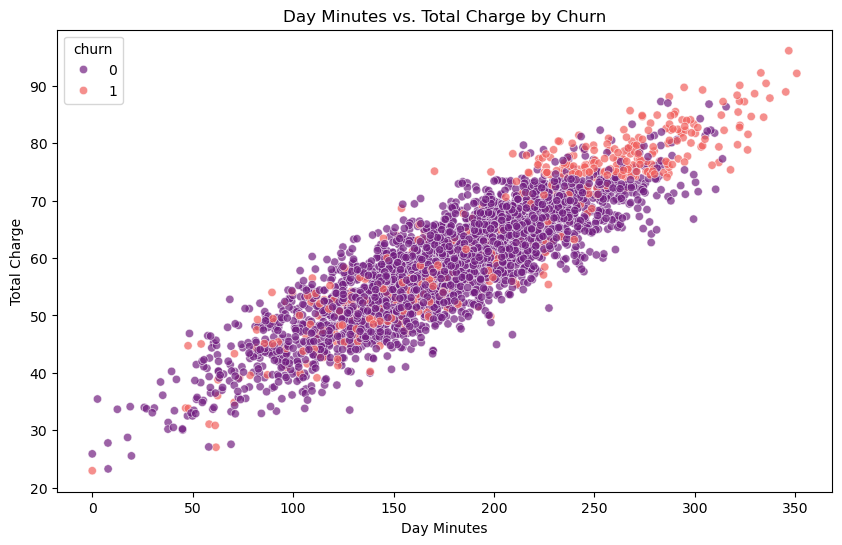

Scatter Plot for Day Mins vs. Total Charge.
Inference: There is a clear linear relationship between day minutes and total charge. Churned customers are clustered in the higher-usage, higher-charge area.



In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='day_mins', y='total_charge', hue='churn', palette='magma', alpha=0.7)
plt.title('Day Minutes vs. Total Charge by Churn')
plt.xlabel('Day Minutes')
plt.ylabel('Total Charge')
plt.show()
print("Scatter Plot for Day Mins vs. Total Charge.")
print("Inference: There is a clear linear relationship between day minutes and total charge. Churned customers are clustered in the higher-usage, higher-charge area.\n")


## 4)HeatMap - Correlation Heatmap between Variables

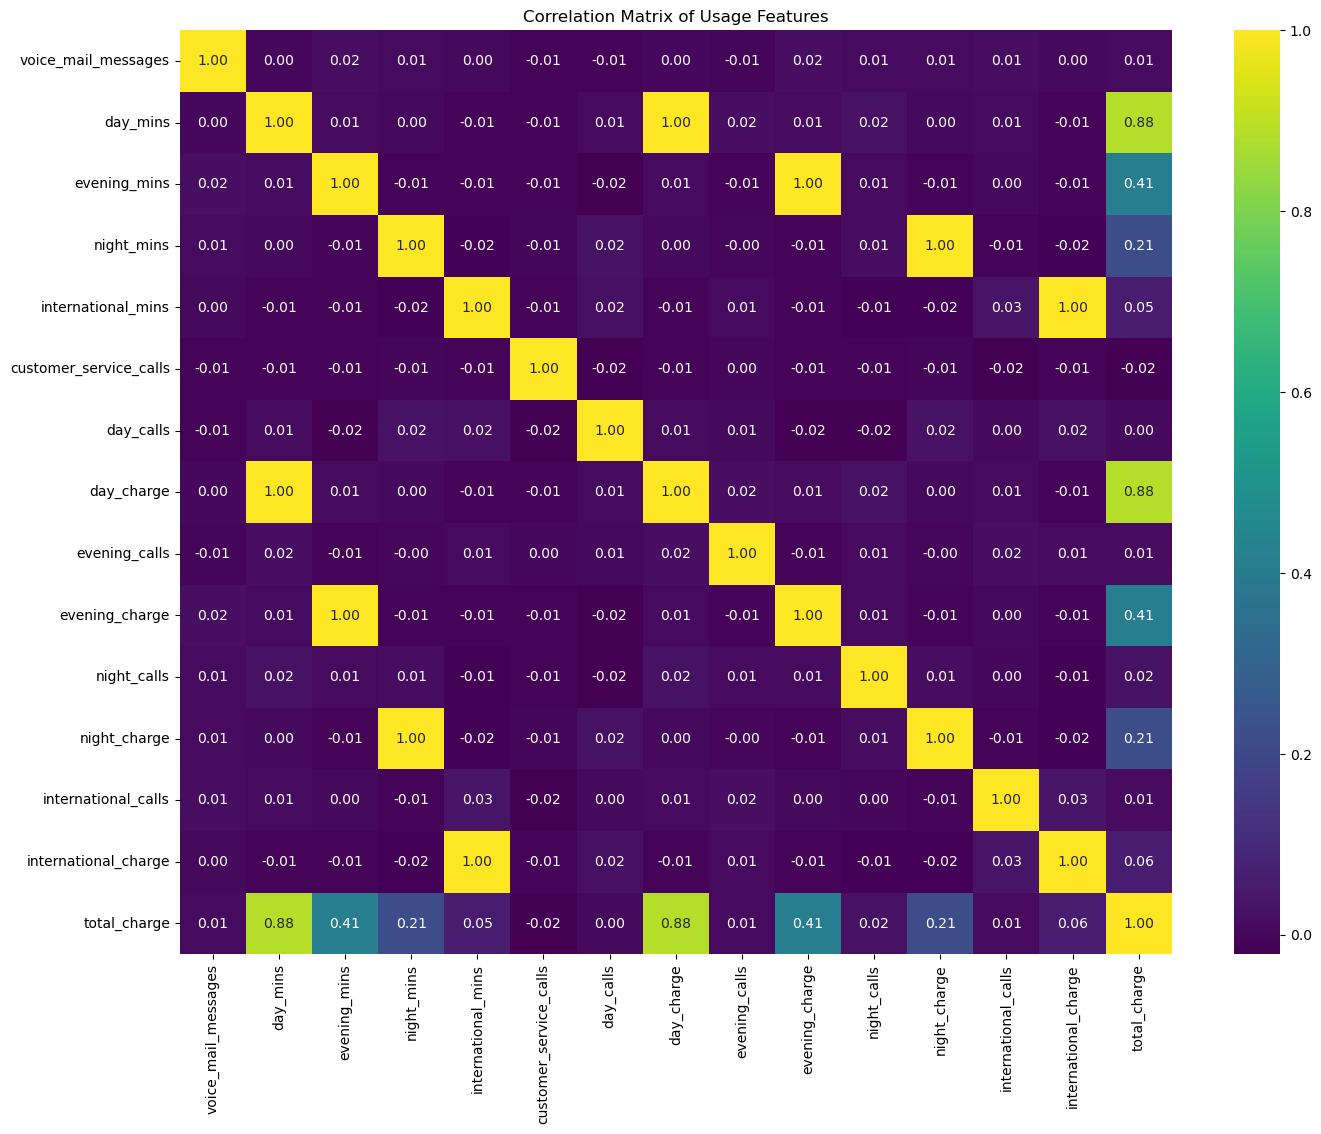

In [19]:
# We create a heatmap to check for multicollinearity.
plt.figure(figsize=(16, 12))
# Drop non-usage columns for a cleaner heatmap of potential correlations
corr_df = df.drop(['account_length', 'voice_mail_plan', 'international_plan', 'churn'], axis=1)
sns.heatmap(corr_df.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix of Usage Features')
plt.savefig('churn prediction correlation_heatmap.png')
plt.show()

1. Remove duplicate features because some variables show the same info (like day_mins and day_charge). Keep just one (e.g., minutes) to make the model simpler.
2. Total bill mostly depends on daytime usage. So, if high bills cause customers to leave, focus on their daytime minutes.
3. Most other features don’t overlap and give unique info. This is good because things like customer service calls and international mins each add useful details for predicting churn.

## 5)BAR CHART

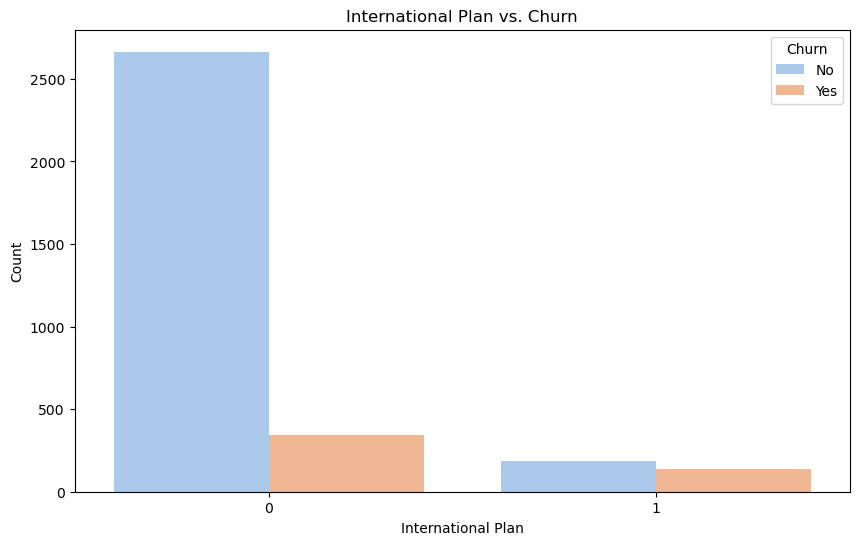

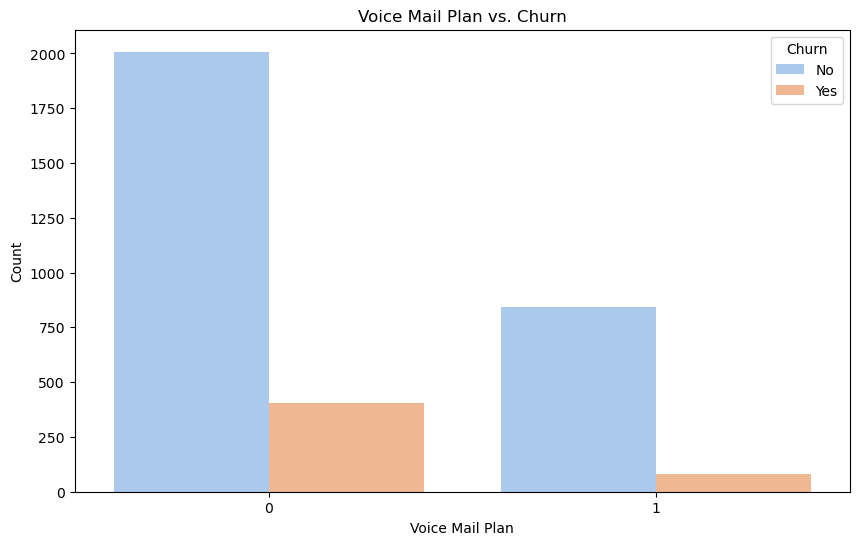

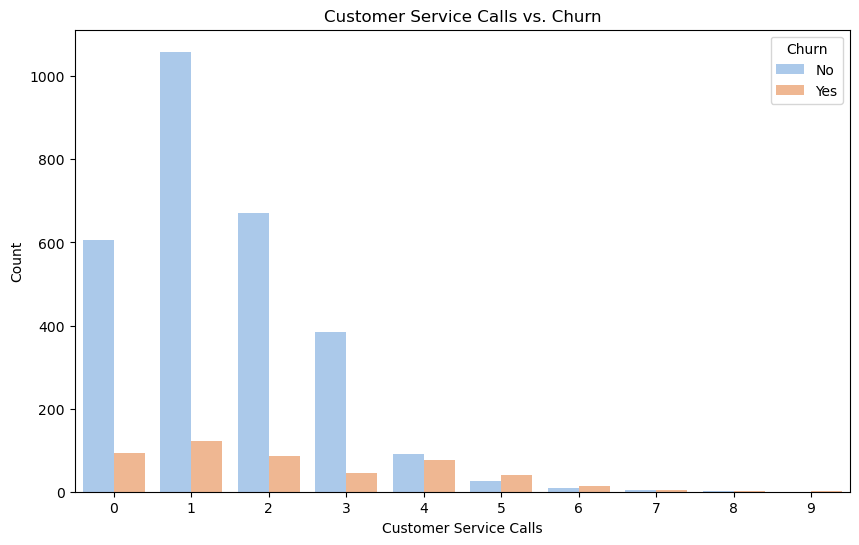

 Inference: Customers with an international plan and those with a high number of customer service calls have a much higher churn rate.



In [20]:
categorical_features = ['international_plan', 'voice_mail_plan', 'customer_service_calls']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='churn', palette='pastel')
    plt.title(f'{feature.replace("_", " ").title()} vs. Churn')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.show()
print(" Inference: Customers with an international plan and those with a high number of customer service calls have a much higher churn rate.\n")


## 6)Count plot

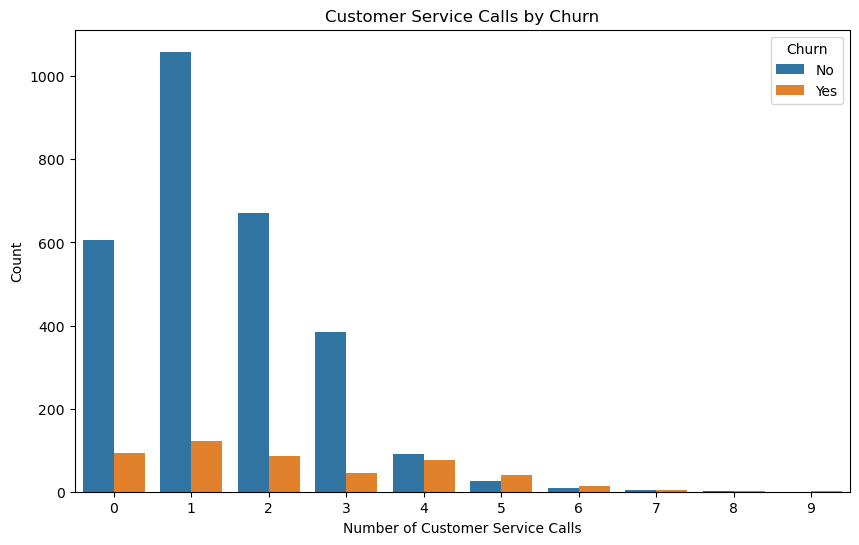

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_service_calls', hue='churn', data=df)
plt.title('Customer Service Calls by Churn')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

Observation and Inference:

This count plot reveals a strong relationship between the number of customer service calls and the likelihood of churning. Customers who make four or more calls to customer service have a much higher churn rate compared to those who make fewer calls. In fact, for those who made 4 or more calls, the number of churned customers is almost equal to or greater than non-churned customers. This feature will likely be a very strong predictor in our models.

## Overall Inference

- Customers are most likely to leave when they are unhappy with service or when their bills are high.  
- A high number of customer service calls indicates dissatisfaction and increases churn risk.  
- High daytime usage leads to higher total charges, which strongly drives churn.  
- The dataset has duplicate features, since charges are directly calculated from minutes, so one of each pair should be removed before modeling.  
- Most customers do not churn, creating class imbalance in the dataset.  
- International and voicemail plans are used by very few customers, adding to imbalance.  
- Overall, churn is mainly linked to dissatisfaction (customer service calls) and high costs (day minutes and charges).

# 3)Feature Engineering

### Exploring the relationship between features and adding new  features for best performance of the model.

In [22]:
# Feature for total minutes
df['total_mins'] = df['day_mins'] + df['evening_mins'] + df['night_mins'] + df['international_mins']

In [23]:
# Feature for total calls
df['total_calls'] = df['day_calls'] + df['evening_calls'] + df['night_calls'] + df['international_calls']

In [24]:
# Feature for average minutes per call
# Avoid division by zero by adding a small epsilon (1e-6)
df['mins_per_call'] = df['total_mins'] / (df['total_calls'] + 1e-6)

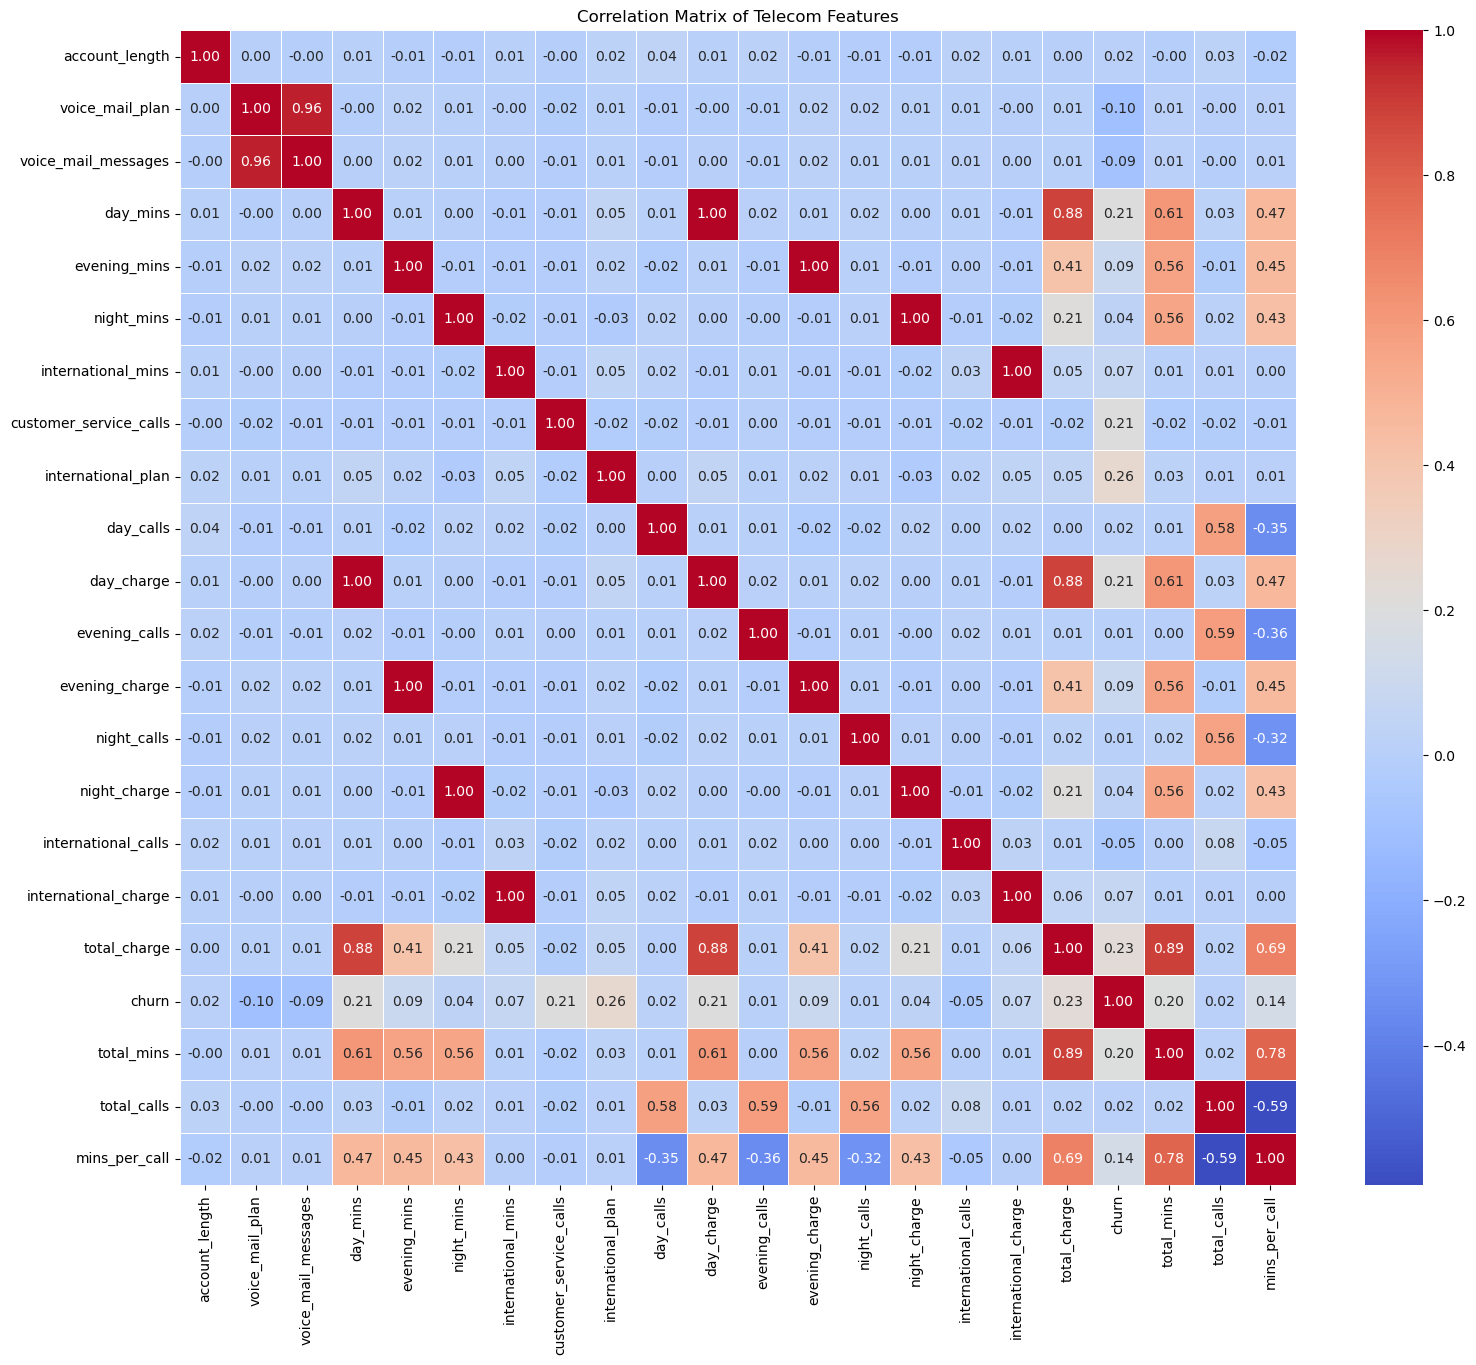

Correlation Heatmap:

 Observation :
1. High multicollinearity exists between usage minutes and charges (e.g., 'day_mins' and 'day_charge'). This is expected.
2. 'churn' has the strongest positive correlations with 'customer_service_calls', 'international_plan', and 'day_mins'.



In [25]:
# Correlation Matrix
plt.figure(figsize=(18, 15))
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Telecom Features')
plt.show()
print("Correlation Heatmap:")
print("\n Observation :")
print("1. High multicollinearity exists between usage minutes and charges (e.g., 'day_mins' and 'day_charge'). This is expected.")
print("2. 'churn' has the strongest positive correlations with 'customer_service_calls', 'international_plan', and 'day_mins'.\n")


In [26]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn', 'total_mins', 'total_calls', 'mins_per_call'],
      dtype='object')

### Target correlation:
1. Target correlation below checks how each feature is related to "churn" (customers leaving).
2. It sorts these relationships from strongest to weakest.
3. Features with high positive correlation mean they increase chance of churn.
4. Features with negative correlation mean they help keep customers.
5. This helps us understand which factors affect customer leaving or staying.

In [27]:
# Target Correlation
print("\n Correlation with Target Variable (churn) :")
target_corr = correlation_matrix['churn'].sort_values(ascending=False)
print(target_corr)
print("\n Inference :")
print("The sorted list confirms that high usage, having an international plan, and frequent customer service calls are most associated with a customer churning.")
print("Conversely, having a voice mail plan is negatively correlated, suggesting it might be a factor in customer retention.\n")


 Correlation with Target Variable (churn) :
churn                     1.000000
international_plan        0.259852
total_charge              0.231549
customer_service_calls    0.208750
day_mins                  0.205151
day_charge                0.205151
total_mins                0.198607
mins_per_call             0.144784
evening_mins              0.092796
evening_charge            0.092786
international_charge      0.068259
international_mins        0.068239
night_charge              0.035496
night_mins                0.035493
day_calls                 0.018459
account_length            0.016541
total_calls               0.015807
evening_calls             0.009233
night_calls               0.006141
international_calls      -0.052844
voice_mail_messages      -0.089728
voice_mail_plan          -0.102148
Name: churn, dtype: float64

 Inference :
The sorted list confirms that high usage, having an international plan, and frequent customer service calls are most associated with a customer

# 4)Data Transformation and Partitioning

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer # scaling the data
from imblearn.over_sampling import SMOTE #Data Balancing

In [29]:
x=df.drop('churn', axis=1)
y=df['churn']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y) #stratify used to maintain the same distribution of churned customers in both training and testing phase.

1. Churn is crucial for imbalanced dataset to get a reliable evaluation of model performance.

In [30]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)
print(f"Original training set shape: {np.bincount(y_train)}")
print(f"Resampled training set shape: {np.bincount(y_train_resampled)}")

Original training set shape: [2280  386]
Resampled training set shape: [2280 2280]


  File "C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


1. SMOTE has balanced the training data by creating synthetic samples for the minority class (churn=1).
2. Now, the model will be trained on an equal number of churned and non-churned customers, which should improve its ability to identify churn.

In [32]:
#shape of train and test
print("Training dataset shape:", x_train.shape, y_train.shape)
print("Test dataset shape:",x_test.shape, y_test.shape)

Training dataset shape: (2666, 21) (2666,)
Test dataset shape: (667, 21) (667,)


# 5)Model Building

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,recall_score,f1_score,roc_auc_score

In [34]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "SVC": SVC(C=0.01,kernel='linear',probability=True,random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

In [35]:
results_df = pd.DataFrame(columns=['Model','Accuracy','Recall Score','F1 Score','ROC AUC Score'])

In [36]:
lb = LabelBinarizer()
lb.fit(y_train)

LabelBinarizer()

In [37]:
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

results_list = [] # created empty list

for name, model in models.items():            #looped through each model
    print(f"Model: {name}")
    
    model.fit(x_train, y_train)                #fitted the model 
    y_pred = model.predict(x_test)
    
    #  metrics calculation
    print(classification_report(y_test, y_pred), '\n')
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred), '\n')
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {accuracy} \n")
    
    # Transform labels for consistent scoring
    y_test_transformed = lb.transform(y_test)
    y_pred_transformed = lb.transform(y_pred)
    

    precision = precision_score(y_test_transformed, y_pred_transformed, pos_label=1)  
    print(f"Precision Score: {precision}")

    recall = recall_score(y_test_transformed, y_pred_transformed, pos_label=1)
    print(f"Recall Score: {recall}")
    
    f1 = f1_score(y_test_transformed, y_pred_transformed, pos_label=1)
    print(f"F1 Score: {f1}")
    
    # ROC AUC Score
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_test_transformed, model.predict_proba(x_test)[:, 1])
        print(f"ROC AUC Score: {roc_auc}")
    else:
        roc_auc = None
        print("ROC AUC Score: Not available")
        
    # append results to list
    new_row = {
        'Model': name, 
        'Accuracy': accuracy, 
        'Precision Score': precision,
        'Recall Score': recall, 
        'F1 Score': f1, 
        'ROC AUC Score': roc_auc
    }
    results_list.append(new_row)
    
    print("-" * 50, '\n')

# created df
results_df = pd.DataFrame(results_list)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       570
           1       0.32      0.06      0.10        97

    accuracy                           0.84       667
   macro avg       0.59      0.52      0.51       667
weighted avg       0.78      0.84      0.80       667
 

Confusion Matrix:
[[557  13]
 [ 91   6]] 

Accuracy Score: 0.8440779610194903 

Precision Score: 0.3157894736842105
Recall Score: 0.061855670103092786
F1 Score: 0.10344827586206896
ROC AUC Score: 0.6914631940676433
-------------------------------------------------- 

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       570
           1       0.79      0.78      0.79        97

    accuracy                           0.94       667
   macro avg       0.88      0.87      0.88       667
weighted avg       0.94      0.94      0.94       667
 

Confusion Matrix:
[[550  2

In [38]:
results_df

,Model,Accuracy,Precision Score,Recall Score,F1 Score,ROC AUC Score
0,Logistic Regression,0.844078,0.315789,0.061856,0.103448,0.691463
1,Decision Tree,0.938531,0.791667,0.783505,0.787565,0.874209
2,Random Forest,0.967016,1.000000,0.773196,0.872093,0.903871
3,Gradient Boosting,0.970015,1.000000,0.793814,0.885057,0.910183
4,K-Nearest Neighbors,0.875562,0.684211,0.268041,0.385185,0.684310
5,SVC,0.854573,0.000000,0.000000,0.000000,0.807488
6,XGBoost,0.973013,1.000000,0.814433,0.897727,0.909477
7,LightGBM,0.967016,0.974684,0.793814,0.875000,0.915265


1. XGBoost is the best model with the highest recall (0.81) and perfect precision (1.00), making it excellent at identifying actual churners without false alarms.

2. Gradient Boosting and LightGBM are close competitors with high recall (~0.79) and near-perfect precision.

3. Random Forest and Decision Tree perform well but have slightly lower recall.

4. KNN, Logistic Regression, and SVC perform poorly on recall, missing most churners despite some decent accuracy.

`Conclusion`: Use XGBoost for churn prediction as it balances catching the most churners and avoiding false positives perfectly.

In [39]:
# --- Feature Importance for the Best Model  ---
best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
best_model.fit(x_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

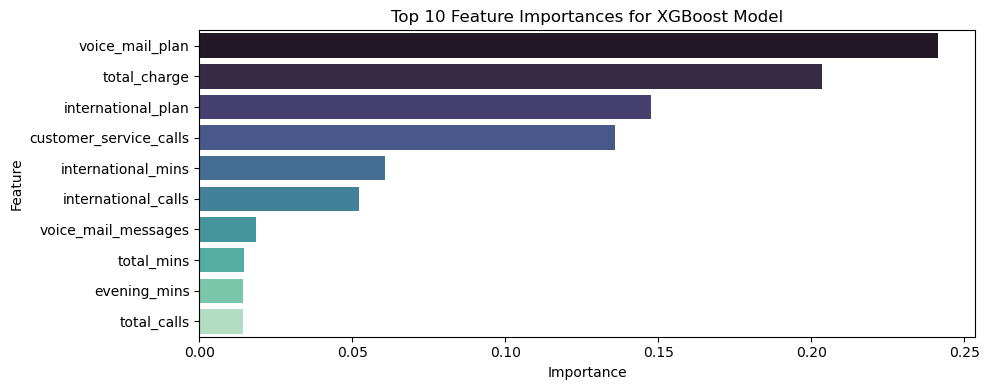

In [40]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='mako')
plt.title('Top 10 Feature Importances for XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 6)Additional Hyperparameter tuning

In [41]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) # Initialize XGBoost classifier

# hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.7, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)  #GridSearchCV with 5 fold cross-validation

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
Best Accuracy: 0.9793705335497608


In [42]:
y_pred_GCV = grid_search.best_estimator_.predict(x_test)

# classification report and confusion matrix
print(classification_report(y_test, y_pred_GCV))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_GCV), '\n')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       1.00      0.78      0.88        97

    accuracy                           0.97       667
   macro avg       0.98      0.89      0.93       667
weighted avg       0.97      0.97      0.97       667

Confusion Matrix:
[[570   0]
 [ 21  76]] 



# 7)Deploy Streamlit

In [43]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn', 'total_mins', 'total_calls', 'mins_per_call'],
      dtype='object')

In [44]:
import joblib

# Save the trained model to a file
filename = 'churn_prediction_model.pkl'
joblib.dump(best_model, open(filename, 'wb'))

In [45]:
!pip install -q streamlit

In [ ]:
code=
import streamlit as st          # for app building
import joblib                   # to load pre-trained ML model
import pandas as pd             # to handle tabular data
from PIL import Image           #To handle banner/sidebar images, PIL - python imaging library
import base64
from io import BytesIO      # to convert images into base64 format for embedding in the app
import numpy as np
import io

# Utility functions
def img_to_base64(img):
    """Converts a PIL Image to a base64 string."""
    buffered = BytesIO()
    img.save(buffered, format='PNG')  # Using PNG for better quality/transparency support
    img_bytes = buffered.getvalue()   # Extracts the raw byte data of the image from memory
    img_base64 = base64.b64encode(img_bytes).decode()
    return img_base64

def convert_df_to_csv_bytes(df):
    """Converts a DataFrame to CSV bytes for downloading."""
    return df.to_csv(index=False).encode('utf-8')

# Functions to create sample telecom dummy datasets
def create_dummy_data_2017():
    data = []
    for i in range(20):
        data.append({
            'account_length': 100 + i,
            'voice_mail_plan': i % 2,
            'voice_mail_messages': i * 2,
            'day_mins': 200 + i*3,
            'evening_mins': 150 + i*2,
            'night_mins': 100 + i,
            'international_mins': 10 + i//2,
            'customer_service_calls': i % 4,
            'international_plan': 0,
            'day_calls': 80 + i,
            'day_charge': 30.0 + i*1.2,
            'evening_calls': 70 + i,
            'evening_charge': 10.0 + i*0.5,
            'night_calls': 50 + i,
            'night_charge': 5.0 + i*0.3,
            'international_calls': 2 + i//4,
            'international_charge': 2.0 + i*0.1,
            'total_charge': 47.0 + i*2,
            'total_mins': 460.0 + i*6,
            'total_calls': 202 + i*3,
            'mins_per_call': 2.3 + (i*0.05)
        })
    return pd.DataFrame(data)

def create_dummy_data_2018():
    data = []
    for i in range(20):
        data.append({
            'account_length': 120 + i,
            'voice_mail_plan': (i+1) % 2,
            'voice_mail_messages': i,
            'day_mins': 180 + i*2.5,
            'evening_mins': 160 + i*1.5,
            'night_mins': 110 + i*1.1,
            'international_mins': 1 + i//3,
            'customer_service_calls': (i+2) % 3,
            'international_plan': 1 if i % 5 == 0 else 0,
            'day_calls': 75 + i,
            'day_charge': 27.0 + i*1.0,
            'evening_calls': 80 + i,
            'evening_charge': 11.0 + i*0.6,
            'night_calls': 55 + i,
            'night_charge': 6.0 + i*0.2,
            'international_calls': 1 + i//5,
            'international_charge': 1.0 + i*0.2,
            'total_charge': 45.0 + i*1.8,
            'total_mins': 451.0 + i*5,
            'total_calls': 211 + i*4,
            'mins_per_call': 2.14 + (i*0.04)
        })
    return pd.DataFrame(data)

def create_dummy_data_telco_x():
    data = []
    for i in range(20):
        data.append({
            'account_length': 110 + i,
            'voice_mail_plan': int(i % 3 == 0),
            'voice_mail_messages': i + 4,
            'day_mins': 210 + i*2,
            'evening_mins': 140 + i*3,
            'night_mins': 100 + i*2,
            'international_mins': 5 + i//3,
            'customer_service_calls': i % 5,
            'international_plan': 0 if i % 4 != 0 else 1,
            'day_calls': 70 + i,
            'day_charge': 25.0 + i*1.4,
            'evening_calls': 60 + i,
            'evening_charge': 9.0 + i*0.6,
            'night_calls': 40 + i,
            'night_charge': 4.0 + i*0.25,
            'international_calls': 3 + i//4,
            'international_charge': 1.5 + i*0.2,
            'total_charge': 42.0 + i*2.1,
            'total_mins': 430.0 + i*7,
            'total_calls': 190 + i*5,
            'mins_per_call': 2.2 + (i * 0.03)
        })
    return pd.DataFrame(data)

def create_dummy_data_telco_y():
    data = []
    for i in range(20):
        data.append({
            'account_length': 105 + i,
            'voice_mail_plan': int((i+1) % 2),
            'voice_mail_messages': (i + 3) * 2,
            'day_mins': 205 + i*3.5,
            'evening_mins': 145 + i*1.8,
            'night_mins': 95 + i*1.2,
            'international_mins': 8 + i//4,
            'customer_service_calls': (i+1) % 3,
            'international_plan': 0,
            'day_calls': 85 + i,
            'day_charge': 28.0 + i*1.1,
            'evening_calls': 75 + i,
            'evening_charge': 12.0 + i*0.4,
            'night_calls': 45 + i,
            'night_charge': 4.5 + i*0.35,
            'international_calls': 2 + i//5,
            'international_charge': 2.0 + i*0.15,
            'total_charge': 46.0 + i*1.9,
            'total_mins': 455.0 + i*5.5,
            'total_calls': 200 + i*3,
            'mins_per_call': 2.25 + (i * 0.02)
        })
    return pd.DataFrame(data)

# App configuration
st.set_page_config(
    page_title="Customer Churn Predictor",
    page_icon="🔮",
    layout="wide",
    initial_sidebar_state="expanded"
)

# --- Banner and Images ---
banner_image_path = "bunny4.png"
sidebar_image_path = "bunny.png"
banner_base64 = None
try:
    banner_img = Image.open(banner_image_path)
    banner_base64 = img_to_base64(banner_img)
    sidebar_img = Image.open(sidebar_image_path)
except FileNotFoundError:
    st.error("Image files (bunny4.png, bunny.png) not found. Please check the file paths.")
    sidebar_img = None

# Corrected Banner Implementation
if banner_base64:
    st.markdown(f"""
    <style>
    .banner {{
        background-image: url("data:image/png;base64,{banner_base64}");
        background-size: cover;
        background-position: center;
        padding: 50px 0px;
        border-radius: 10px;
        text-align: center;
        margin-bottom: 20px;
    }}
    .banner-text {{
        font-size: 2.5em;
        font-weight: bold;
        color: white;
        text-shadow: 2px 2px 4px #000000;
    }}
    </style>
    """, unsafe_allow_html=True)
    st.markdown('<div class="banner"><div class="banner-text">Customer Churn Predictor 🔮</div></div>', unsafe_allow_html=True)
else:
    # Fallback title if image fails to load
    st.title("Customer Churn Predictor 🔮")

# --- Initial Disclaimer and Sample Data Download ---
if 'popup_shown' not in st.session_state:
    st.markdown("### Disclaimer")
    st.markdown("""
        ** 1. Welcome to the Customer Churn Predictor!** This is a ML app. Predictions are from a historical data trained model - GB45.
        2. Please select one sample dataset below and download it if you want to try uploading sample data for prediction.
        
        3. Select dataset and click download to get sample telecom customer records.
        """)
    
    sample_datasets = {
        "Telecom Data 2017": create_dummy_data_2017(),
        "Telecom Data 2018": create_dummy_data_2018(),
        "TelcoX Sample": create_dummy_data_telco_x(),
        "TelcoY Sample": create_dummy_data_telco_y(),
    }
    selected_ds_name = st.selectbox("Select a Sample Dataset to Download", options=list(sample_datasets.keys()))
    
    csv_bytes = convert_df_to_csv_bytes(sample_datasets[selected_ds_name])
    st.download_button(
        label=f"Download {selected_ds_name} CSV",
        data=csv_bytes,
        file_name=f"{selected_ds_name.replace(' ', '_').lower()}.csv",
        mime="text/csv"
    )
    if st.button("I Understand and Agree"):
        st.session_state.popup_shown = True
        st.rerun()

# When the user clicks "I Understand and Agree", the disclaimer disappears permanently using st.session_state

# --- Main Application Logic ---
if st.session_state.get('popup_shown', False):
    @st.cache_resource   # to cache the loaded model so it does not reload every time
    def load_model():
        """Loads the trained model, caching it for performance."""
        try:
            with open('churn_prediction_model.pkl', 'rb') as f:
                model = joblib.load(f)
            return model
        except FileNotFoundError:
            st.error("Model file 'churn_prediction_model.pkl' not found.")
            return None

    best_model = load_model()

    if best_model:
        st.sidebar.header('👤 Customer Details')
        if sidebar_img:
            st.sidebar.image(sidebar_img, caption="Connected Customers")  
        
        st.sidebar.markdown("---")
        
        features = ['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins', 
                    'evening_mins', 'night_mins', 'international_mins', 'customer_service_calls',
                    'international_plan', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge',
                    'night_calls', 'night_charge', 'international_calls', 'international_charge',
                    'total_charge', 'total_mins', 'total_calls', 'mins_per_call']
        categorical_features = ['voice_mail_plan', 'international_plan']

        def zero_out_mins_and_charges(df):   # Ensures logical consistency in customer data
            """Recalculates totals and zeros out mins/charges if calls are zero."""   # If number of calls = 0 , then minutes and charges also set to 0
            call_mappings = [
                ('day_calls', 'day_mins', 'day_charge'),
                ('evening_calls', 'evening_mins', 'evening_charge'),
                ('night_calls', 'night_mins', 'night_charge'),
                ('international_calls', 'international_mins', 'international_charge')
            ]
            for calls_col, mins_col, charge_col in call_mappings:
                if calls_col in df.columns:
                    zero_mask = df[calls_col] == 0
                    if mins_col in df.columns: df.loc[zero_mask, mins_col] = 0
                    if charge_col in df.columns: df.loc[zero_mask, charge_col] = 0
            
            # Recalculate totals
            df['total_calls'] = df[[c for c,, in call_mappings if c in df.columns]].sum(axis=1)
            df['total_mins'] = df[[m for ,m, in call_mappings if m in df.columns]].sum(axis=1)
            df['mins_per_call'] = (df['total_mins'] / df['total_calls']).fillna(0)
            return df

        # --- File Upload Section ---
        uploaded_file = st.sidebar.file_uploader("Upload a CSV file with customer data", type=['csv'])
        if uploaded_file is not None:
            df_uploaded = pd.read_csv(uploaded_file)
            df_uploaded.columns = df_uploaded.columns.str.strip().str.lower().str.replace(' ', '_')
            for cat_feat in categorical_features:
                if cat_feat in df_uploaded.columns:
                    df_uploaded[cat_feat] = df_uploaded[cat_feat].map({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0, 1: 1, 0: 0}).fillna(df_uploaded[cat_feat])
            
            df_processed = zero_out_mins_and_charges(df_uploaded.copy())
            df_model_ready = df_processed.reindex(columns=features).fillna(0)
            preds = best_model.predict(df_model_ready)
            proba = best_model.predict_proba(df_model_ready)[:, 1] * 100
            df_uploaded['churn_prediction'] = ['Churn' if x == 1 else 'Stay' for x in preds]
            df_uploaded['churn_probability (%)'] = proba.round(2)

            st.markdown("### Uploaded Data with Predictions")
            st.dataframe(df_uploaded)
            csv_data = convert_df_to_csv_bytes(df_uploaded)
            st.download_button(
                label="Download CSV with Predictions",
                data=csv_data,
                file_name="predictions.csv",
                mime="text/csv"
            )

        st.markdown("---")
        st.markdown("## Enter Customer Details Manually")

        # --- Manual Input Form ---
        with st.form(key='manual_input_form'):
            manual_inputs = {}
            cols = st.columns(3)
            field_layout = {
                'account_length': 0, 'customer_service_calls': 0, 'voice_mail_plan': 0, 'voice_mail_messages': 0, 'international_plan': 0,
                'day_calls': 1, 'day_mins': 1, 'day_charge': 1, 'evening_calls': 1, 'evening_mins': 1, 'evening_charge': 1,
                'night_calls': 2, 'night_mins': 2, 'night_charge': 2, 'international_calls': 2, 'international_mins': 2, 'international_charge': 2
            }
            
            # Define which features should be integers
            integer_features = [
                'account_length', 'voice_mail_messages', 'day_calls', 'night_calls',
                'customer_service_calls', 'evening_calls', 'international_calls'
            ]
            
            for feature in features:
                if feature not in field_layout:
                    continue
                col_index = field_layout[feature]
                
                with cols[col_index]:
                    if feature in categorical_features:
                        val = st.radio(f"{feature.replace('_',' ').title()}", ("No", "Yes"), horizontal=True)
                        manual_inputs[feature] = 1 if val == "Yes" else 0
                    elif feature in integer_features:
                        manual_inputs[feature] = st.number_input(
                            f"{feature.replace('_',' ').title()}",
                            min_value=0,
                            value=0,
                            step=1,
                            format="%d"
                        )
                    else:
                        manual_inputs[feature] = st.number_input(
                            f"{feature.replace('_',' ').title()}",
                            min_value=0.0,
                            value=0.0,
                            format="%.2f"
                        )
            submit_manual = st.form_submit_button("Predict Churn")

        if submit_manual:
            df_manual = pd.DataFrame([manual_inputs])
            df_processed_manual = zero_out_mins_and_charges(df_manual.copy())
            df_model_ready_manual = df_processed_manual.reindex(columns=features).fillna(0)
            preds_manual = best_model.predict(df_model_ready_manual)
            proba_manual = best_model.predict_proba(df_model_ready_manual)[:, 1] * 100
            prediction = 'Churn' if preds_manual[0] == 1 else 'Stay'
            probability = proba_manual[0]
            st.markdown("### Manual Entry Prediction Result")
            if prediction == "Churn":
                st.error(f"Prediction: {prediction} with {probability:.2f}% probability.")
            else:
                st.success(f"Prediction: {prediction} with {100-probability:.2f}% probability.")
            
            st.write("Based on the details provided:")
            st.dataframe(df_processed_manual)


with open("Customer_churn.py", "w",encoding="utf-8") as file:
    
    file.write(code)

In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
!streamlit run Customer_churn.py & npx localtunnel --port 8501